In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset
df = pd.read_csv('Electric_Vehicle_Registration_Data.csv')

In [5]:
# Displaying basic info and first few rows to inspect the data
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60489 entries, 0 to 60488
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  60489 non-null  int64 
 1   Vehicle Plate Type  60489 non-null  object
 2   City                60442 non-null  object
 3   State               60442 non-null  object
 4   Vehicle Type        60489 non-null  object
 5   Vehicle Year        60489 non-null  int64 
 6   Vehicle Make        60489 non-null  object
 7   Vehicle Model       60489 non-null  object
 8   Vehicle Body        60489 non-null  object
 9   Vehicle Color       60489 non-null  object
 10  Vehicle Name        60489 non-null  object
 11  Type                60489 non-null  object
dtypes: int64(2), object(10)
memory usage: 5.5+ MB


(None,
     ID Vehicle Plate Type         City State Vehicle Type  Vehicle Year  \
 0   13          Passenger  GLASTONBURY    CT          SUV          2023   
 1   19          Passenger       ORANGE    CT          SUV          2023   
 2   21          Passenger   LITCHFIELD    CT          SUV          2023   
 3   73          Passenger      NORWALK    CT          SUV          2023   
 4  126          Passenger  SOUTHINGTON    CT    Passenger          2023   
 
   Vehicle Make        Vehicle Model Vehicle Body Vehicle Color  \
 0        Tesla              Model Y           SU         Black   
 1         Jeep  Wrangler Sahara 4xe           4W         White   
 2        Tesla              Model Y           SU          Gray   
 3      Hyundai      Ioniq 5 Limited           SU         Green   
 4      Hyundai          Ioniq 5 Sel           4D          Blue   
 
             Vehicle Name  Type  
 0          Tesla Model Y   BEV  
 1  Jeep Wrangler Plug In  PHEV  
 2          Tesla Model Y   B

In [16]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

ID                     0
Vehicle Plate Type     0
City                  47
State                 47
Vehicle Type           0
Vehicle Year           0
Vehicle Make           0
Vehicle Model          0
Vehicle Body           0
Vehicle Color          0
Vehicle Name           0
Type                   0
dtype: int64

In [18]:
# Drop rows with missing values 
df.dropna(inplace=True)

In [20]:
# Rechecking after droping for missing values for City and State
missing_values = df.isnull().sum()
missing_values

ID                    0
Vehicle Plate Type    0
City                  0
State                 0
Vehicle Type          0
Vehicle Year          0
Vehicle Make          0
Vehicle Model         0
Vehicle Body          0
Vehicle Color         0
Vehicle Name          0
Type                  0
dtype: int64

In [24]:
# Setting the style for better aesthetics
sns.set_style("whitegrid")

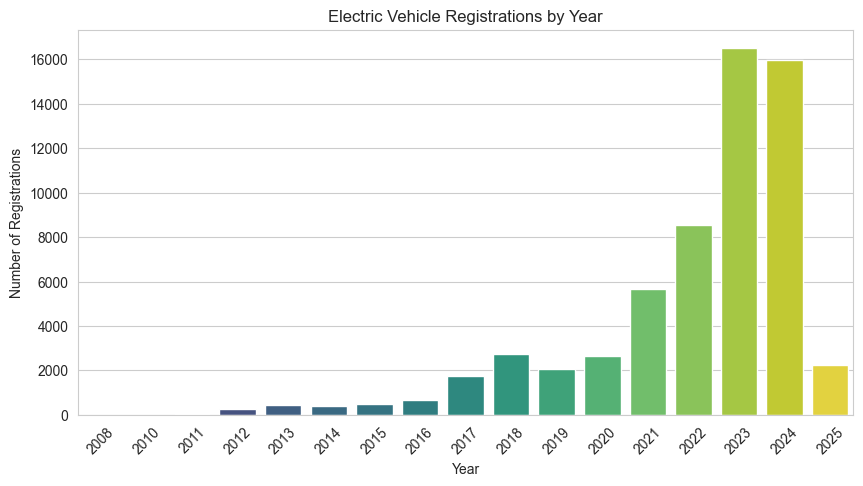

In [44]:
# Figure 1: Vehicle Registrations by Year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Vehicle Year", order=sorted(df["Vehicle Year"].unique()),hue="Vehicle Year", legend=False, palette="viridis")
plt.xticks(rotation=45)
plt.title("Electric Vehicle Registrations by Year")
plt.xlabel("Year")
plt.ylabel("Number of Registrations")
plt.show()

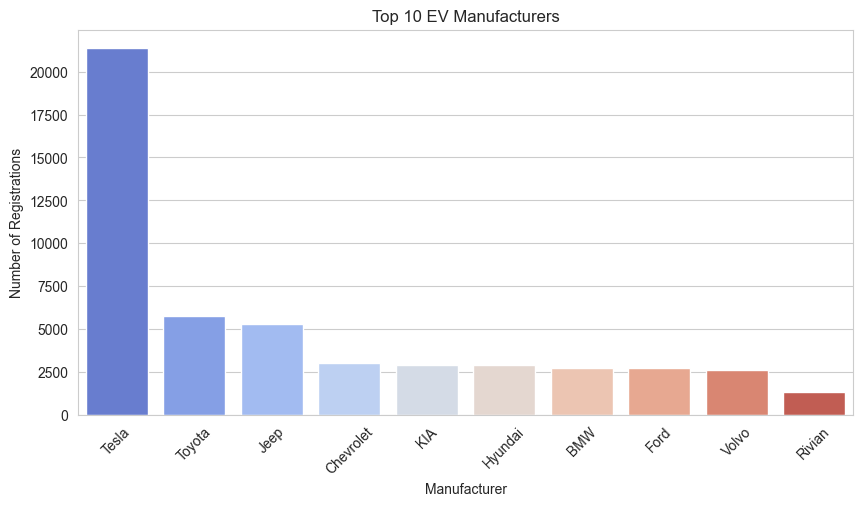

In [56]:
# Figure 2: Top 10 EV Manufacturers
plt.figure(figsize=(10, 5))
top_makes = df["Vehicle Make"].value_counts().nlargest(10)
sns.barplot(x=top_makes.index, y=top_makes.values, hue=top_makes.index, legend=False, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 EV Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Registrations")
plt.show()

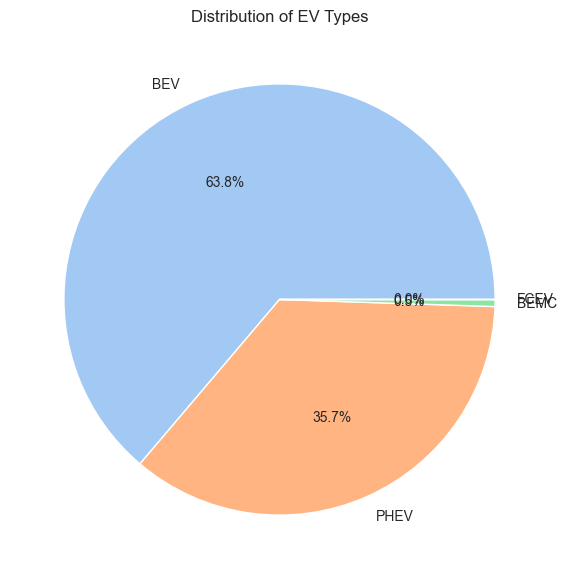

In [58]:
# Figure 3: EV Distribution by Type (BEV vs. PHEV)
plt.figure(figsize=(7, 7))
type_counts = df["Type"].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Distribution of EV Types")
plt.show()

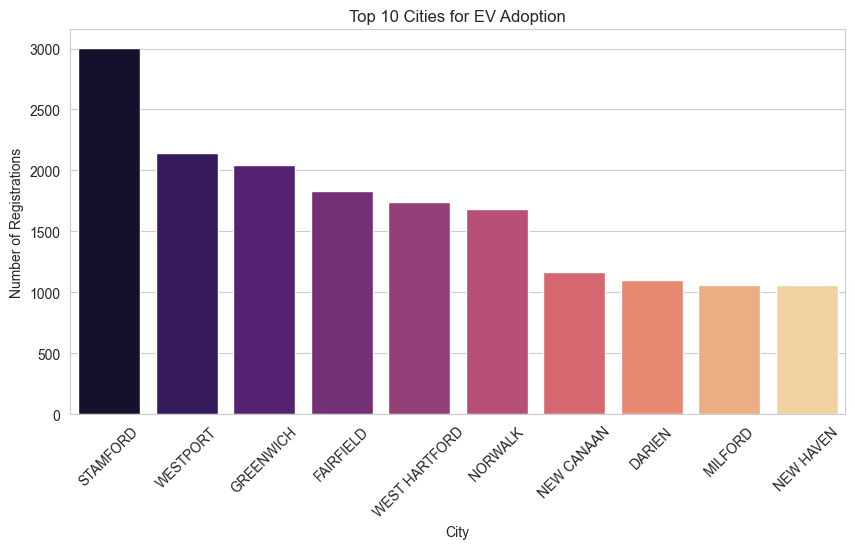

In [68]:
# Figure 4: Top 10 Cities for EV Adoption
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, hue=top_cities.index, legend=False, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 Cities for EV Adoption")
plt.xlabel("City")
plt.ylabel("Number of Registrations")
plt.show()


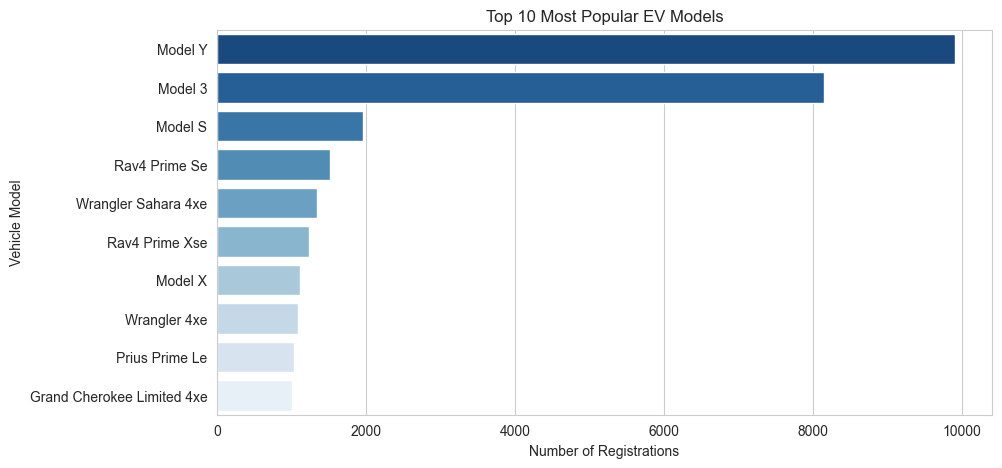

In [77]:
# Figure 5: Most Popular EV Models
plt.figure(figsize=(10, 5))
top_models = df["Vehicle Model"].value_counts().nlargest(10)
sns.barplot(y=top_models.index, x=top_models.values,hue=top_models.index,legend=False,palette="Blues_r")
plt.title("Top 10 Most Popular EV Models")
plt.xlabel("Number of Registrations")
plt.ylabel("Vehicle Model")
plt.show()

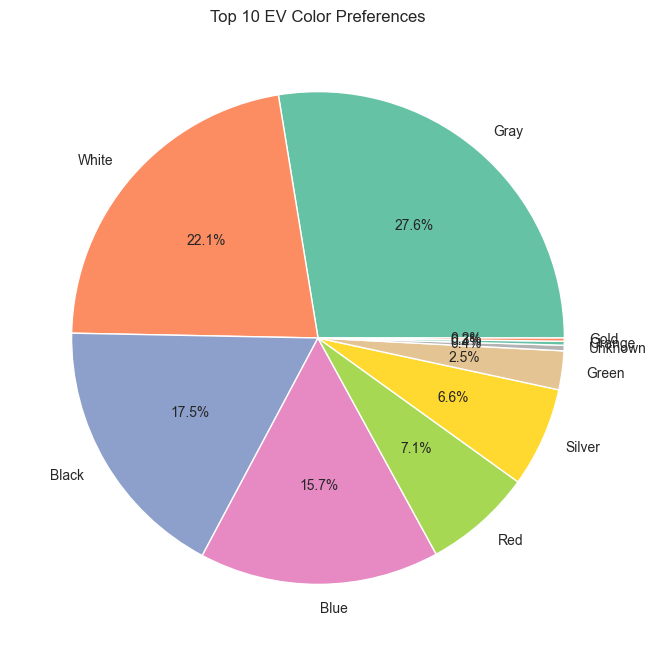

In [79]:
# Figure 6: EV Color Preferences
plt.figure(figsize=(8, 8))
color_counts = df["Vehicle Color"].value_counts().nlargest(10)
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Top 10 EV Color Preferences")
plt.show()

In [81]:
# Saving cleaned dataset for visualizations in Power BI
df.to_csv('Electric_Vehicle_Registration_Data_cleaned.csv', index=False)